# Early Stopping

Early stopping is a regularization method which involves algorithm termination when no parameters have improved over the best recorded validation error for some pre-speciﬁed number of iterations. In $\href{https://www.researchgate.net/profile/Lutz_Prechelt/publication/2874749_Early_Stopping_-_But_When/links/551bc1650cf2fe6cbf75e533.pdf}{Early stopping but when?}$, the authors have mentioned different types of stopping criteria for learning. In this problem, we will use the third type of stopping criteria mentioned in the paper i.e.** if validation error has increased $s$ times, then it is a case of overfitting independent of how large the increase is.**

The code below uses 500 images. The layers.py file contains early_stop function. Check line 139 in model.py for implementation of early stopping.



In [1]:
# Import the functions
from layers import *
from utilities import *
from model import two_layered_NN
# Set up the packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
%matplotlib inline
maybe_download_and_extract()

file exists


In [2]:
# get CIFAR-10 data
train_,tr_labels,val,val_labels=load_CIFAR10_data()
# Pre-processing the training data
train_ = np.float32(train_) # change the datatype to float
train_ /= np.max(train_,axis=1).reshape(-1,1) # Normalize the data between 0 and 1

#slice the input to only 500 samples
train_ = train_[0:500,:]
tr_labels = tr_labels[0:500]

# Pre-processing the validation data
val = np.float32(val)
val /= np.max(val,axis=1).reshape(-1,1)  # We use the last 10000 images for validation

# Store training and validation data in data dictionary
data = {'train':train_,'tr_targets':tr_labels,'val':val,'tr_val':val_labels}

# Check the sizes of training and validation data
print('Training data size: ',data['train'].shape, ', Validation data size: ',data['val'].shape)

Training data size:  (500, 3072) , Validation data size:  (10000, 3072)


In [3]:
# Load the SGD model
model = two_layered_NN(data)
# Train the two layered neural network
_,loss_history_sgd,train_acc_history_sgd,val_acc_history_sgd=model.train()

Optimization using SGD
Optimization using SGD
Optimization using SGD
Optimization using SGD


/Users/dakshakkchandra/Downloads/EXAM#1/layers.py:140: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(x[range(num_train), list(y)]))


iteration 0 / 1000 :loss 51.4625566288
training accuracy: 0.2 and validation accuracy: 0.0979| validation loss: inf
Last Loss1000000; Loss Count0
iteration 10 / 1000 :loss 2.77337263591
training accuracy: 0.25 and validation accuracy: 0.0992| validation loss: 2.58781421142
Last Lossinf; Loss Count1
iteration 20 / 1000 :loss 2.25281024876
training accuracy: 0.15 and validation accuracy: 0.116| validation loss: 2.54307604419
Last Loss2.58781421142; Loss Count0
iteration 30 / 1000 :loss 2.17403160585
training accuracy: 0.3 and validation accuracy: 0.1346| validation loss: 2.47781001528
Last Loss2.54307604419; Loss Count0
iteration 40 / 1000 :loss 2.3379976582
training accuracy: 0.15 and validation accuracy: 0.1396| validation loss: 2.44548511492
Last Loss2.47781001528; Loss Count0
iteration 50 / 1000 :loss 1.95280479668
training accuracy: 0.4 and validation accuracy: 0.1532| validation loss: 2.44821750728
Last Loss2.44548511492; Loss Count0
iteration 60 / 1000 :loss 1.92933514316
training

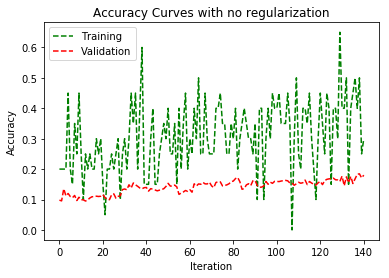

In [4]:
# Plot the accuracy curves
plt.plot(train_acc_history_sgd,'g--',label='Training')
plt.plot(val_acc_history_sgd,'r--',label='Validation')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves with no regularization')
plt.show()

In [5]:
# Load the SGD Momentum model
model = two_layered_NN(data, optimization = 'SGD_with_momentum')
# Train the two layered neural network
_,loss_history_sgd,train_acc_history_sgd_m,val_acc_history_sgd_m=model.train()

Optimization using SGD and Momentum
Optimization using SGD and Momentum
Optimization using SGD and Momentum
Optimization using SGD and Momentum
iteration 0 / 1000 :loss 29.7988513668
training accuracy: 0.2 and validation accuracy: 0.0951| validation loss: 45.3247724513
Last Loss1000000; Loss Count0
iteration 10 / 1000 :loss 8.79378886545
training accuracy: 0.25 and validation accuracy: 0.1552| validation loss: 7.04707712847
Last Loss45.3247724513; Loss Count0
iteration 20 / 1000 :loss 2.78568626897
training accuracy: 0.1 and validation accuracy: 0.1111| validation loss: 2.68130488437
Last Loss7.04707712847; Loss Count0
iteration 30 / 1000 :loss 2.44042817595
training accuracy: 0.35 and validation accuracy: 0.1076| validation loss: 2.47069382056
Last Loss2.68130488437; Loss Count0
iteration 40 / 1000 :loss 2.27255430946
training accuracy: 0.05 and validation accuracy: 0.1082| validation loss: 2.40114216384
Last Loss2.47069382056; Loss Count0
iteration 50 / 1000 :loss 2.16137893097
train

In [6]:
# Load the RMS Prop model
model = two_layered_NN(data, optimization = 'rmsprop')
# Train the two layered neural network
_,loss_history_sgd,train_acc_history_rms,val_acc_history_rms=model.train()

Optimization using RMS prop
Optimization using RMS prop
Optimization using RMS prop
Optimization using RMS prop


/Users/dakshakkchandra/Downloads/EXAM#1/layers.py:140: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(x[range(num_train), list(y)]))


iteration 0 / 1000 :loss 31.5912118592
training accuracy: 0.25 and validation accuracy: 0.1013| validation loss: inf
Last Loss1000000; Loss Count0
iteration 10 / 1000 :loss 161.410387365
training accuracy: 0.1 and validation accuracy: 0.1072| validation loss: 116.29875417
Last Lossinf; Loss Count1
iteration 20 / 1000 :loss 2.48621831432
training accuracy: 0.3 and validation accuracy: 0.1031| validation loss: 2.41399598093
Last Loss116.29875417; Loss Count0
iteration 30 / 1000 :loss 2.29609337141
training accuracy: 0.3 and validation accuracy: 0.096| validation loss: 2.37507180694
Last Loss2.41399598093; Loss Count0
iteration 40 / 1000 :loss 2.30479637934
training accuracy: 0.05 and validation accuracy: 0.1023| validation loss: 2.3552975923
Last Loss2.37507180694; Loss Count0
iteration 50 / 1000 :loss 2.30992633825
training accuracy: 0.1 and validation accuracy: 0.097| validation loss: 2.3728654819
Last Loss2.3552975923; Loss Count0
iteration 60 / 1000 :loss 2.25051625479
training accur

In [7]:
# Load the Adam Optimizer model
model = two_layered_NN(data, optimization = 'adam')
# Train the two layered neural network
_,loss_history_sgd,train_acc_history_adam,val_acc_history_adam=model.train()

Optimization using ADAM
Optimization using ADAM
Optimization using ADAM
Optimization using ADAM
iteration 0 / 1000 :loss 30.1314276777
training accuracy: 0.15 and validation accuracy: 0.0919| validation loss: 102.907111735
Last Loss1000000; Loss Count0
iteration 10 / 1000 :loss 77.4011632347
training accuracy: 0.2 and validation accuracy: 0.0975| validation loss: 54.8183450252
Last Loss102.907111735; Loss Count0
iteration 20 / 1000 :loss 22.5597131869
training accuracy: 0.2 and validation accuracy: 0.1115| validation loss: 23.3446087904
Last Loss54.8183450252; Loss Count0
iteration 30 / 1000 :loss 9.32785378007
training accuracy: 0.05 and validation accuracy: 0.164| validation loss: 7.7624042296
Last Loss23.3446087904; Loss Count0
iteration 40 / 1000 :loss 6.91077594625
training accuracy: 0.15 and validation accuracy: 0.1368| validation loss: 6.14762976322
Last Loss7.7624042296; Loss Count0
iteration 50 / 1000 :loss 3.15586304508
training accuracy: 0.05 and validation accuracy: 0.0982|

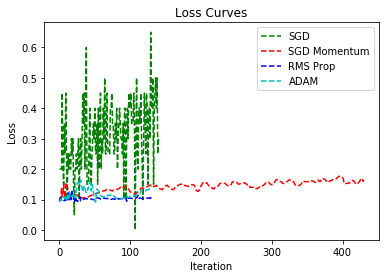

In [8]:
# Plot the accuracy curves
plt.plot(train_acc_history_sgd,'g--',label='SGD')
plt.plot(val_acc_history_sgd_m,'r--',label='SGD Momentum')
plt.plot(val_acc_history_rms,'b--',label='RMS Prop')
plt.plot(val_acc_history_adam,'c--',label='ADAM')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.show()

In [9]:
#using Full Data
# get CIFAR-10 data
train_,tr_labels,val,val_labels=load_CIFAR10_data()
# Pre-processing the training data
train_ = np.float32(train_) # change the datatype to float
train_ /= np.max(train_,axis=1).reshape(-1,1) # Normalize the data between 0 and 1

#slice the input to only 500 samples
train_ = train_[0:40000,:]
tr_labels = tr_labels[0:40000]

# Pre-processing the validation data
val = np.float32(val)
val /= np.max(val,axis=1).reshape(-1,1)  # We use the last 10000 images for validation

# Store training and validation data in data dictionary
data = {'train':train_,'tr_targets':tr_labels,'val':val,'tr_val':val_labels}

# Check the sizes of training and validation data
print('Training data size: ',data['train'].shape, ', Validation data size: ',data['val'].shape)

Training data size:  (40000, 3072) , Validation data size:  (10000, 3072)


In [10]:
#Full Training Set
# Load the SGD model
model = two_layered_NN(data)
# Train the two layered neural network
_,loss_history_sgd,train_acc_history_sgd,val_acc_history_sgd=model.train()

Optimization using SGD
Optimization using SGD
Optimization using SGD
Optimization using SGD


/Users/dakshakkchandra/Downloads/EXAM#1/layers.py:140: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(x[range(num_train), list(y)]))


iteration 0 / 1000 :loss 30.3623279476
training accuracy: 0.3 and validation accuracy: 0.1461| validation loss: inf
Last Loss1000000; Loss Count0
iteration 10 / 1000 :loss 2.536561078
training accuracy: 0.15 and validation accuracy: 0.1055| validation loss: 2.65818865901
Last Lossinf; Loss Count1
iteration 20 / 1000 :loss 2.48481436925
training accuracy: 0.2 and validation accuracy: 0.1039| validation loss: 2.45781196494
Last Loss2.65818865901; Loss Count0
iteration 30 / 1000 :loss 2.3135939751
training accuracy: 0.15 and validation accuracy: 0.1196| validation loss: 2.42404043479
Last Loss2.45781196494; Loss Count0
iteration 40 / 1000 :loss 2.35874956303
training accuracy: 0.1 and validation accuracy: 0.125| validation loss: 2.39487637657
Last Loss2.42404043479; Loss Count0
iteration 50 / 1000 :loss 2.18054581704
training accuracy: 0.5 and validation accuracy: 0.1225| validation loss: 2.39599250765
Last Loss2.39487637657; Loss Count0
iteration 60 / 1000 :loss 2.11304436
training accur

iteration 510 / 1000 :loss 2.24866541373
training accuracy: 0.4 and validation accuracy: 0.1784| validation loss: 2.17313579974
Last Loss2.15479544619; Loss Count0
iteration 520 / 1000 :loss 2.07481073883
training accuracy: 0.25 and validation accuracy: 0.183| validation loss: 2.17088519261
Last Loss2.17313579974; Loss Count1
iteration 530 / 1000 :loss 1.99167299739
training accuracy: 0.35 and validation accuracy: 0.1836| validation loss: 2.16987025397
Last Loss2.17088519261; Loss Count0
iteration 540 / 1000 :loss 2.2327738153
training accuracy: 0.2 and validation accuracy: 0.1878| validation loss: 2.16346149901
Last Loss2.16987025397; Loss Count0
iteration 550 / 1000 :loss 1.99980696828
training accuracy: 0.25 and validation accuracy: 0.1755| validation loss: 2.17751462942
Last Loss2.16346149901; Loss Count0
iteration 560 / 1000 :loss 2.34180495721
training accuracy: 0.35 and validation accuracy: 0.1576| validation loss: 2.21122350678
Last Loss2.17751462942; Loss Count1
iteration 570 

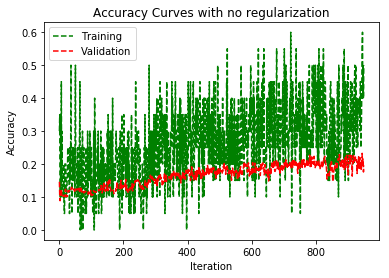

In [11]:
# Plot the accuracy curves
plt.plot(train_acc_history_sgd,'g--',label='Training')
plt.plot(val_acc_history_sgd,'r--',label='Validation')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves with no regularization')
plt.show()

By observing the graphs above we can see that Early stopping regularization method when implmented terminates when no parameters have improved over the best recorded validation error for the pre-speciﬁed number of iterations. The graph which shows the implemented Early stopping Regularization stops when overfitting is reached, whereas while retraining the SGD model of complete training data we can see that it keeps on running though it has reached overfitting.<br>
Early Stopping can be used to speed up learning procedure or in improving generalization. However there exists tradeoff between training time and generalization.